In [78]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data cleaning

In [79]:
# defining the file paths for the datasets
customers = "data/olist_customers_dataset.csv"
geolocation = "data/olist_geolocation_dataset.csv"
order_items = "data/olist_order_items_dataset.csv"
order_payments = "data/olist_order_payments_dataset.csv"
order_reviews = "data/olist_order_reviews_dataset.csv"
orders = "data/olist_orders_dataset.csv"
products = "data/olist_products_dataset.csv"
sellers = "data/olist_sellers_dataset.csv"
product_category_name_translation = "data/product_category_name_translation.csv"

In [80]:
# reading the datasets into pandas DataFrames
customers_df = pd.read_csv(customers)
geolocation_df = pd.read_csv(geolocation)
order_items_df = pd.read_csv(order_items)
order_payments_df = pd.read_csv(order_payments)
order_reviews_df = pd.read_csv(order_reviews)
orders_df = pd.read_csv(orders)
products_df = pd.read_csv(products)
sellers_df = pd.read_csv(sellers)
product_category_name_translation_df = pd.read_csv(product_category_name_translation)

In [81]:
# defining functions to clean and preprocess the data
def checkingforduplinull(df, name="DataFrame"):
    print(f"Checking for duplicates and null values in `{name}`...")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Null values: {df.isnull().sum().sum()}")
    print("\n")

In [82]:
#checking for duplicates and null values in each DataFrame
checkingforduplinull(customers_df, "customers_df")
checkingforduplinull(geolocation_df, "geolocation_df")
checkingforduplinull(order_items_df, "order_items_df")
checkingforduplinull(order_payments_df, "order_payments_df")
checkingforduplinull(order_reviews_df, "order_reviews_df")
checkingforduplinull(orders_df, "orders_df")
checkingforduplinull(products_df, "products_df")
checkingforduplinull(sellers_df, "sellers_df")
checkingforduplinull(product_category_name_translation_df, "product_category_name_translation_df")

Checking for duplicates and null values in `customers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `geolocation_df`...
Duplicates: 261831
Null values: 0


Checking for duplicates and null values in `order_items_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_payments_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_reviews_df`...
Duplicates: 0
Null values: 145903


Checking for duplicates and null values in `orders_df`...
Duplicates: 0
Null values: 4908


Checking for duplicates and null values in `products_df`...
Duplicates: 0
Null values: 2448


Checking for duplicates and null values in `sellers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `product_category_name_translation_df`...
Duplicates: 0
Null values: 0




## Geolocation_df

In [83]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


duplicates are normal as one place can have multiple orders.

In [84]:
# finding which column null values appear in the order_reviews DataFrame
order_reviews_df.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [85]:
# order_reviews_df dataset
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


we will also leave order_reviews_df alone as review comment titles and message are not crucial.

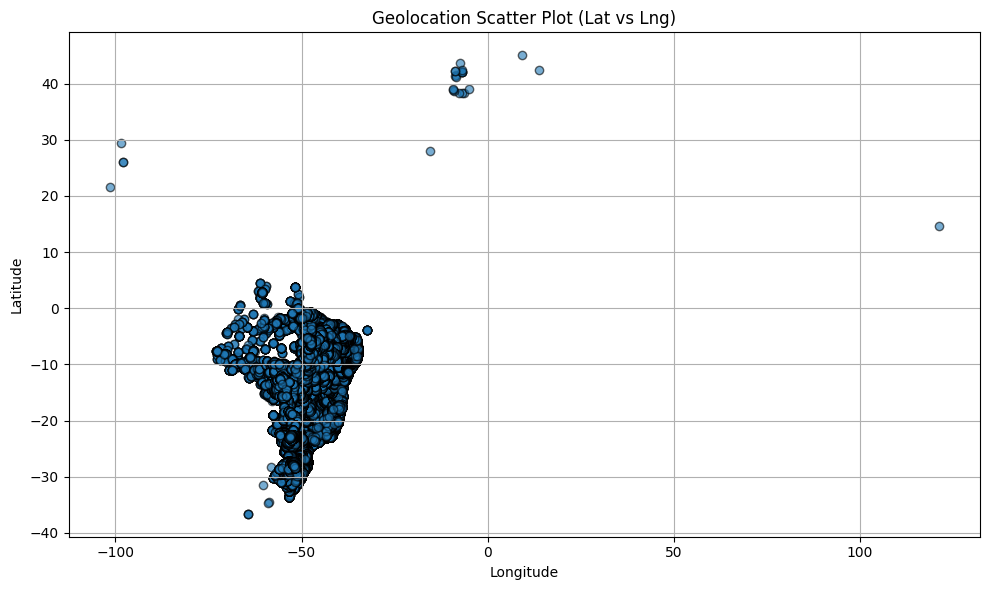

In [86]:
# plotting lat against lng from geolocation_df
plt.figure(figsize=(10, 6))
plt.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"], alpha=0.6, edgecolors='k')
plt.title("Geolocation Scatter Plot (Lat vs Lng)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Calculate z-scores for latitude and longitude
geolocation_df["lat_z"] = zscore(geolocation_df["geolocation_lat"])
geolocation_df["lng_z"] = zscore(geolocation_df["geolocation_lng"])

# Set a threshold (e.g. 3 standard deviations from the mean)
threshold = 10

# Identify rows where either lat or lng z-score is above the threshold
outliers = geolocation_df[(geolocation_df["lat_z"].abs() > threshold) | (geolocation_df["lng_z"].abs() > threshold)]

# Drop the z-score columns if not needed
geolocation_df.drop(columns=["lat_z", "lng_z"], inplace=True)

# Display the outliers
outliers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,lat_z,lng_z
513631,28165,41.614052,-8.411675,vila nova de campos,RJ,10.985253,8.894877
513754,28155,42.439286,13.820214,santa maria,RJ,11.129629,14.101718
514429,28333,38.381672,-6.328200,raposo,RJ,10.419742,9.382839
516682,28595,43.684961,-7.411080,portela,RJ,11.347562,9.129222
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES,8.850002,-12.200627


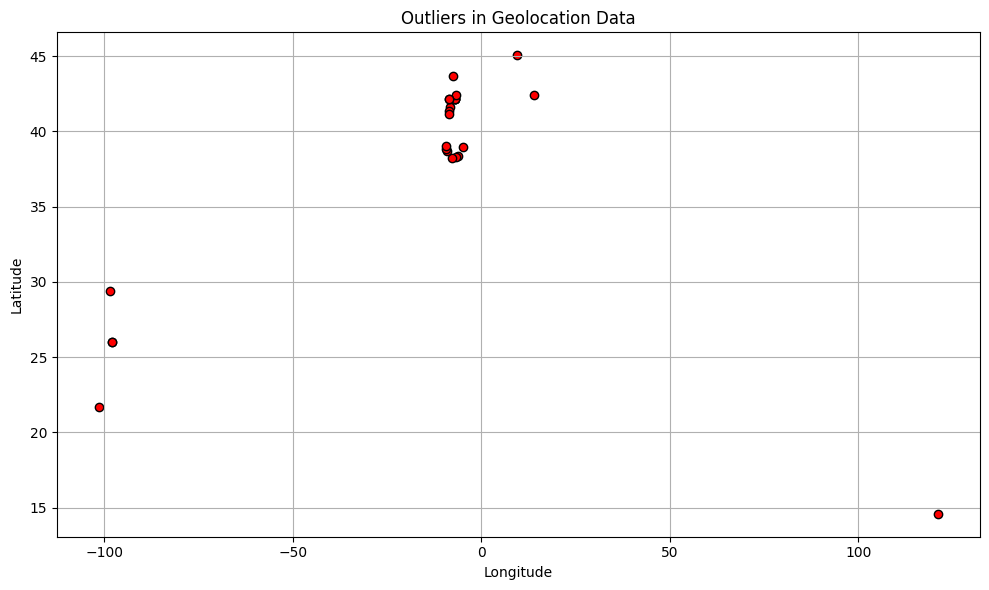

In [88]:
# plot outliers in geolocation data for visualization
plt.figure(figsize=(10, 6))
plt.scatter(outliers["geolocation_lng"], outliers["geolocation_lat"], color='red', edgecolors='k')
plt.title("Outliers in Geolocation Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [89]:
# removing outliers from the geolocation DataFrame
geolocation_df = geolocation_df.drop(outliers.index)


## Orders_df

In [90]:
# finding the number of null values in each column of the orders DataFrame
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [91]:
# rows that do not have "delivered" in the order_status column
non_delivered = orders_df[orders_df['order_status'] != 'delivered']
non_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [92]:
# unfilled/null rows even with "delivered" status
delivered_with_nulls = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [93]:
# Dropping unfilled rows even with "delivered" status
orders_df = orders_df.drop(delivered_with_nulls.index)


In [94]:
# checking for unfilled/null rows even with "delivered" status again
delivered_with_nulls_again = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls_again

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


the other null values in "orders_df" are normal due to their respective "order_status"

## products_df

In [95]:
# checking for null values in the products DataFrame columns
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [96]:
# checking for null values in the products DataFrame
empty_product_name = products_df[products_df['product_category_name'].isnull()]
empty_product_name.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [97]:
# finding the 2 outliers, 2 null values in product_weight_g, product_length_cm, product_height_cm and product_width_cm
empty = products_df[products_df['product_weight_g'].isnull()]
empty

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


should remove product_id = 5eb564652db742ff8f28759cd8d2652a, as everything is empty.

In [98]:
#defining removing product_id = 5eb564652db742ff8f28759cd8d2652a
def remove_product_id_5eb564652db742ff8f28759cd8d2652a(df):
    # removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
    df = df[df['product_id'] != '5eb564652db742ff8f28759cd8d2652a']
    return df

In [99]:
#removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
products_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(products_df)
order_items_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(order_items_df)



## Order_payments_df

Merging rows of same order_id into 1.

In [ ]:
# merging rows by order_id, combining payment types, installments, and values
order_payments_df = order_payments_df.groupby('order_id').agg({
    'payment_type': lambda x: ','.join(sorted(set(x))),
    'payment_installments': 'sum',
    'payment_value': 'sum'
}).reset_index()


In [ ]:
# Example
order_payments_df[order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_type,payment_installments,payment_value
36023,5cfd514482e22bc992e7693f0e3e8df7,"credit_card,voucher",5,710.58


# Exporting the cleaned datasets

In [ ]:
# Export cleaned dataframes to the cleaned_data directory
customers_df.to_csv('cleaned_data/cleaned_customers.csv', index=False)
geolocation_df.to_csv('cleaned_data/cleaned_geolocation.csv', index=False)
order_items_df.to_csv('cleaned_data/cleaned_order_items.csv', index=False)
order_payments_df.to_csv('cleaned_data/cleaned_order_payments.csv', index=False)
order_reviews_df.to_csv('cleaned_data/cleaned_order_reviews.csv', index=False)
orders_df.to_csv('cleaned_data/cleaned_orders.csv', index=False)
products_df.to_csv('cleaned_data/cleaned_products.csv', index=False)
sellers_df.to_csv('cleaned_data/cleaned_sellers.csv', index=False)
product_category_name_translation_df.to_csv('cleaned_data/cleaned_product_category_name_translation.csv', index=False)


# Merge Section (id needed)